'성별'과 '국민연금 납부여부' 항목 결측치 확인 및 대체

In [146]:
welfare_19['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [147]:
# 결측확인
welfare_19['sex'].isna().sum()

0

In [148]:
# 성별, 항목 이름 부여
welfare_19['sex']=np.where(welfare_19['sex']==1,'male','female')

# 빈도 구하기
welfare_19['sex'].value_counts() # 빈도수

sex
female    7913
male      6505
Name: count, dtype: int64

In [149]:
welfare_19['pension_status'].value_counts('1')

pension_status
1.0    0.778565
2.0    0.221435
Name: proportion, dtype: float64

In [150]:
welfare_19['pension_status'].isna().sum()

9902

In [151]:
# 결측치의 개수 계산
missing_count = welfare_19['pension_status'].isna().sum()

# 각 값의 개수 계산
count_1 = int(missing_count * 0.8)  # 80%는 1로
count_2 = missing_count - count_1   # 나머지 20%는 2로

# 결측치를 채울 값 생성
fill_values = [1] * count_1 + [2] * count_2

# 결측치 위치의 인덱스 찾기
nan_indices = welfare_19[welfare_19['pension_status'].isna()].index

# 랜덤하게 결측치 인덱스를 선택하여 채우기
np.random.shuffle(fill_values)
welfare_19.loc[nan_indices, 'pension_status'] = fill_values

# 결과 확인
print("Pension Status Distribution After Filling:")
print(welfare_19['pension_status'].value_counts())

Pension Status Distribution After Filling:
pension_status
1.0    11437
2.0     2981
Name: count, dtype: int64


In [152]:
# 결측치 개수 0 확인
welfare_19['pension_status'].isna().sum()

0

In [153]:
# 국민연금 납부 여부 항목 이름 부여
welfare_19['pension_status']=np.where(welfare_19['pension_status']==1,'paid','unpaid')

성별에 따른 국민연금 납부 여부

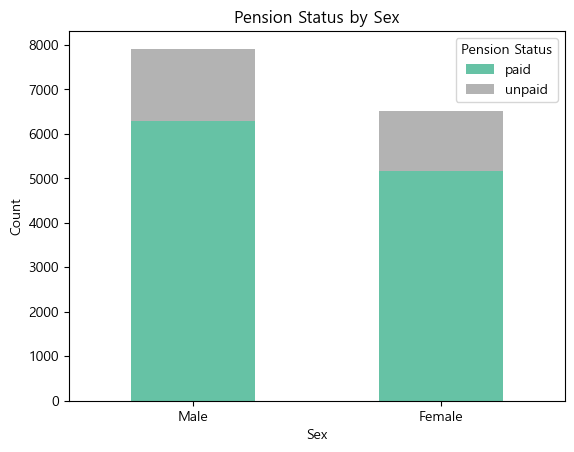

In [154]:
# 데이터 그룹화 및 집계
grouped_data = welfare_19.groupby(['sex', 'pension_status']).size().unstack()

# 막대 그래프 생성
grouped_data.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Pension Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Pension Status')
plt.xticks(ticks=range(len(grouped_data.index)), labels=['Male', 'Female'], rotation=0)
plt.show()

'장애종류'와 '외래진료 횟수' 항목 결측치 확인 및 대체 및 제거

In [155]:
welfare_19['disabled_type'].isna().sum()

0

In [156]:
welfare_19['disabled_type'].value_counts()

disabled_type
0.0     13068
1.0       661
4.0       161
3.0       140
2.0       118
6.0        94
16.0       47
9.0        42
8.0        36
7.0        10
14.0       10
11.0        8
5.0         7
15.0        5
10.0        5
12.0        5
13.0        1
Name: count, dtype: int64

In [157]:
# 0:비장애인, 1:지체장애, 2:뇌병변장애, 3:시각장애, 4:청각장애 5~: 그 외

welfare_19['disabled']=np.where(welfare_19['disabled_type']==0, '비장애인',
                           np.where(welfare_19['disabled_type']==1,'지체장애',
                                    np.where(welfare_19['disabled_type']==2,'뇌병변장애',
                                             np.where(welfare_19['disabled_type']==3,'시각장애',
                                                      np.where(welfare_19['disabled_type']==4,'청각장애','그 외')))))

welfare_19['disabled'].head(10)

0    비장애인
1    비장애인
2    비장애인
3    비장애인
4    비장애인
5    비장애인
6    비장애인
7    비장애인
8    지체장애
9    비장애인
Name: disabled, dtype: object

In [158]:
welfare_19['hospital_year'].isna().sum()

2

In [159]:
# 외래진료횟수 150회 이상은 결측치로 처리
welfare_19['hospital_year']=np.where(welfare_19['hospital_year']>=150,np.nan,welfare_19['hospital_year'])

In [160]:
# 결측치 제거
welfare_19 = welfare_19.dropna(subset=['hospital_year'])

장애종류에 따른 평균 외래진료 횟수

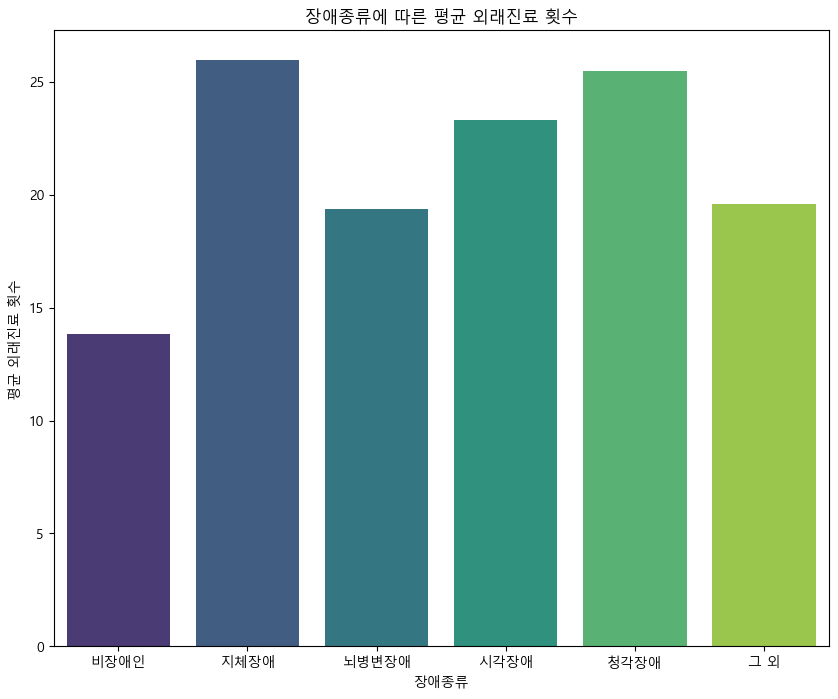

In [161]:
# 'disabled' 열의 각 범주별로 'hospital_year' 평균 계산
average_hospital_visits = welfare_19.groupby('disabled')['hospital_year'].mean().reset_index()

# 막대 그래프 생성
plt.figure(figsize=(10, 8))
sns.barplot(data=average_hospital_visits, x='disabled', y='hospital_year', palette='viridis', order=['비장애인','지체장애','뇌병변장애','시각장애','청각장애','그 외'])
plt.title('장애종류에 따른 평균 외래진료 횟수')
plt.xlabel('장애종류')
plt.ylabel('평균 외래진료 횟수')
plt.xticks(rotation=0)  # x축 레이블을 읽기 쉽게 회전
plt.show()

'월급' 항목 결측치 확인 및 대체 및 제거

In [162]:
# 이상치는 결측 처리
welfare_19['income']=np.where(welfare_19['income']>=9500, np.nan, welfare_19['income'])

# 결측치 확인
welfare_19['income'].isna().sum()

11738

In [163]:
# 장애종류별 월급 평균
dis_income=welfare_19.dropna(subset=['income'])\
                  .groupby('disabled',as_index=False)\
                  .agg(mean_income=('income','mean'))
dis_income

,disabled,mean_income
0,그 외,4459.375000
1,뇌병변장애,3330.500000
2,비장애인,3855.683915
3,시각장애,2173.285714
4,지체장애,3861.820513
5,청각장애,2998.000000


장애종류별 평균 월급

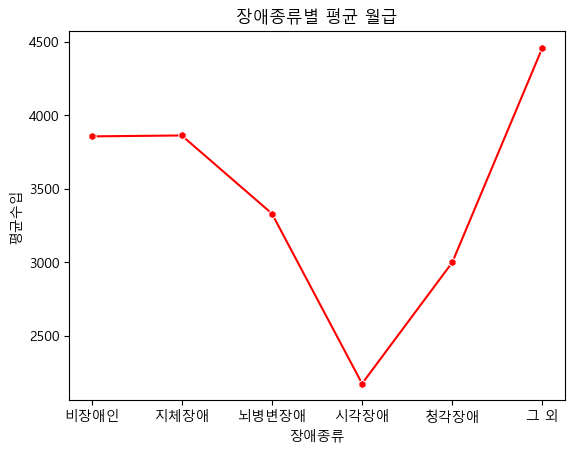

In [164]:
# 'disabled' 컬럼을 범주형으로 변환하고 순서 지정
dis_income['disabled'] = pd.Categorical(dis_income['disabled'], 
                                       categories=['비장애인', '지체장애', '뇌병변장애', '시각장애', '청각장애', '그 외'],
                                       ordered=True)

# 데이터 정렬
dis_income = dis_income.sort_values('disabled')


# 선 그래프 그리기
sns.lineplot(data=dis_income, x='disabled', y='mean_income', marker='h', color='red')
plt.title("장애종류별 평균 월급")
plt.xlabel('장애종류')
plt.ylabel('평균수입')
plt.xticks(rotation=0) # x축 범주들 글자 각도 조정, 필요에 따라 조절
plt.show()

In [165]:
welfare_19['eW'].isna().sum()

1653

In [166]:
welfare_19 = welfare_19.dropna(subset=['eW'])

In [168]:
welfare_19['eW'].value_counts()

working
9.0    5651
1.0    2476
2.0    1542
6.0    1308
3.0     517
7.0     430
4.0     346
5.0     224
8.0     155
Name: count, dtype: int64

In [169]:
welfare_19['eW'] = np.where((welfare_19['eW'] == 8) | (welfare_19['eW'] == 9), '비근로자', '근로자')

In [172]:
welfare_19['eW'].value_counts('1')

working
근로자     0.540991
비근로자    0.459009
Name: proportion, dtype: float64

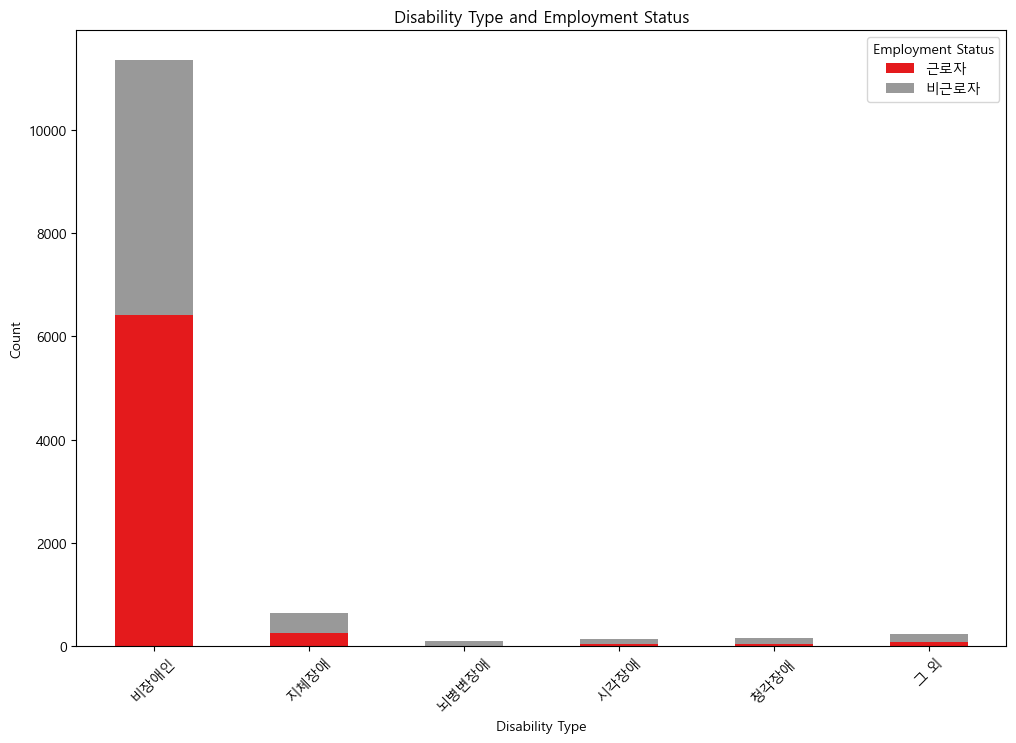

In [174]:
# 장애 종류의 순서를 지정하여 데이터 정렬
order = ['비장애인', '지체장애', '뇌병변장애', '시각장애', '청각장애', '그 외']
welfare_19['disabled'] = pd.Categorical(welfare_19['disabled'], categories=order, ordered=True)

# 데이터 그룹화 및 집계
grouped_data = welfare_19.groupby(['disabled', 'eW']).size().unstack().reindex(columns=['근로자', '비근로자'], fill_value=0)

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
ax = grouped_data.plot(kind='bar', stacked=True, colormap='Set1', ax=plt.gca())

# 제목 및 축 레이블 설정
plt.title('Disability Type and Employment Status')
plt.xlabel('Disability Type')
plt.ylabel('Count')

# x축 레이블 설정
plt.xticks(ticks=range(len(grouped_data.index)), labels=grouped_data.index, rotation=45)

# 범례 설정
plt.legend(title='Employment Status')

# 그래프 표시
plt.show()

In [175]:

# 장애 종류의 순서를 지정하여 데이터 정렬
order = ['비장애인', '지체장애', '뇌병변장애', '시각장애', '청각장애', '그 외']
welfare_19['disabled'] = pd.Categorical(welfare_19['disabled'], categories=order, ordered=True)

# 데이터 그룹화 및 집계
grouped_data = welfare_19.groupby(['disabled', 'eW']).size().unstack().reindex(columns=['근로자', '비근로자'], fill_value=0)

# 비장애인 제외
filtered_data = grouped_data.drop(index='비장애인')

# 비장애인을 제외한 나머지 범주의 총 수
total_counts_excluding_non_disabled = filtered_data.sum().sum()

# 비장애인을 제외한 나머지 범주에서 근로자의 총 수
total_employed_excluding_non_disabled = filtered_data['근로자'].sum()

# 비율 계산
employment_percentage = (total_employed_excluding_non_disabled / total_counts_excluding_non_disabled) * 100

# 결과 출력
print(f'장애인 중에서 근로자 비율: {employment_percentage:.2f}%')
print(f'장애인 중에서 비근로자 비율: {100-employment_percentage:.2f}%')

장애인 중에서 근로자 비율: 33.77%
장애인 중에서 비근로자 비율: 66.23%
